In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import skimage.measure

from IPython.display import clear_output

import random
import time
import copy
import math
import os

master_big


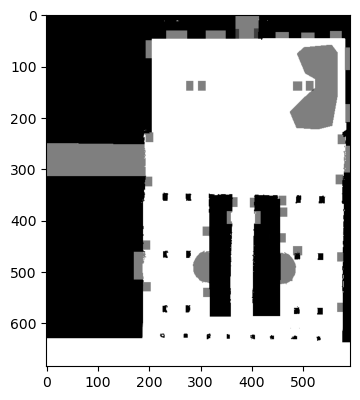

In [34]:
div = 32
step = int(32/4)

sem_dict = ['cash', 'entrance', 'light', 'sit', 'stairs', 'trash', 'tree']
chans = len(sem_dict)+1

map_list = ['master_big'] #'master_big','willow','costacafe','map1','map2','map3']

# -----------------------------------------------------------------------------------
for map_name in map_list:
  print(map_name)

  lines = 0
  with open('maps/semantics/'+map_name+'/'+map_name+'.csv') as f:
    lines = f.readlines()

  h = len(lines)
  w = len(lines[0].split(','))

  # Converts data to a list of integers
  map = []
  for line in lines:
    map.extend([int(c) for c in line.split(',')])

  for lab_class in sem_dict:
    lines = 0
    with open('maps/semantics/'+map_name+'/'+map_name+'_sem_'+lab_class+'.csv') as f:
      lines = f.readlines()

    hh = len(lines)
    ww = len(lines[0].split(','))

    if hh != h or ww != w:
      print(f'h: {h}\tw: {w}')
      print(f'h: {hh}\tw: {ww}')
      raise SystemExit("ERROR: Different sizes!!")

    # Converts data to a list of integers
    for line in lines:
      map.extend([int(c) for c in line.split(',')])

  map = np.reshape(map,[chans,h,w])
  map = np.moveaxis(map, 0, -1)
  map = map/255

  # # -----------------------------------------------------------------------------------
  # lines = 0
  # with open('maps/semantics/'+map_name+'/humandensity-'+map_name+'5.csv') as f:
  #   lines = f.readlines()

  # hd = len(lines)
  # wd = len(lines[0].split(','))

  # # Converts data to a list of integers
  # data = []
  # for line in lines:
  #   data.extend([int(c) for c in line.split(',')])

  # data = np.reshape(data,[hd,wd])
  # data = np.subtract(data, np.full((h, w), np.min(data)))/(np.max(data)-np.min(data))

  alp = 0.5
  complete_map = np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2)
  for i in range(len(sem_dict)):
    complete_map = np.multiply(complete_map, np.stack((map[:,:,i],map[:,:,i],map[:,:,i]),axis=2)*alp+(1-alp))

  fig = plt.figure(figsize=(w/150,h/150))
  plt.imshow(complete_map, vmin=0, vmax=1)
  plt.show()

Many people tend to walk at about 1.42 metres per second (5.1 km/h; 3.2 mph; 4.7 ft/s).

Add benches, tables & chairs
Add also velocity information (two different maps for velocities and regions of stop)
Add heading of motion (directional velocity)
MAYBE Time of the day

mobility: main cues they are looking for (narrow places, which other criterias?) "Criterium" what do we need to look for
(from computer vision)

In [ ]:
human_path = 1+np.zeros(map[:,:,0].shape)

thickness = 10
span = int(thickness/2)

position = np.array((290, 5))
objective = np.array((250, 250))
k = 2
dt = 0.1

pix = 0.1 #meters/pixel
max_vel = 1.5 / pix

while True:
    acc = np.array((k*(objective[0] - position[0]), k*(objective[1] - position[1])))
    vel = np.array((min(acc[0] * dt, max_vel), min(acc[1] * dt, max_vel)))
    space = vel * dt
    position = np.add(position, (round(space[0]),round(space[1])))
    human_path[position[0]-span:position[0]+span,position[1]-span:position[1]+span] = 0

    
    clear_output(wait=True)
    plt.figure(figsize=(w/150,h/150))
    plt.imshow(np.multiply(np.stack((map[:,:,0],map[:,:,0],map[:,:,0]),axis=2), np.stack((np.full(map[:,:,0].shape,1),human_path,human_path),axis=2)), vmin=0, vmax=1)
    plt.show()

    print(acc)
    print(vel)
    print(space)
    print(position)

    time.sleep(dt)